In [1]:
import sys

# laptop
sys.path.append( '/home/greg/current/NMEG_utils/py_modules/' )

# UNM desktop
#sys.path.append( '..\\NMEG_utils\\py_modules\\' )
#af_path = 'C:\\Research_Flux_Towers\\Ameriflux_files\\'
#fig_path = 'figures\\multiyear_figs\\'

import load_nmeg as ld
import transform_nmeg as tr
import plot_nmeg as nmegplt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#import ipdb as ipdb

%matplotlib inline
sns.set_style("white")

/home/greg/data/anaconda3/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
data_path = '/home/greg/current/NMEG_utils/processed_data/daily_aflx/'
fig_path = '../figures/multiyear_figs/'

# Years to load
start = 2007
end = 2015
# Sites to load (pulls list of AF sites from plot_nmeg module)
sites = ['Seg', 'Sen']
# Fill a dict with multiyear dataframes for each site in sites
daily = { x : 
         ld.load_local_file( data_path + 'US-' + x + '_daily_aflx.csv')
         for x in sites }
d = pd.Panel(daily)

Parsing /home/greg/current/NMEG_utils/processed_data/daily_aflx/US-Seg_daily_aflx.csv
Parsing /home/greg/current/NMEG_utils/processed_data/daily_aflx/US-Sen_daily_aflx.csv


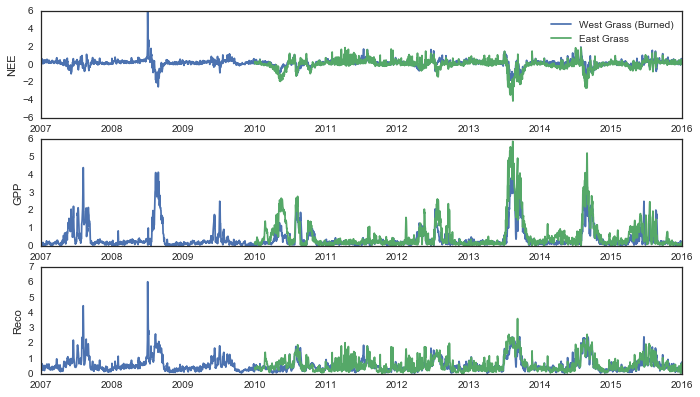

In [111]:
fig1 = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
ax = plt.subplot(3, 1, 1)
ax.plot(d.Seg.index, d.Seg.FC_F_g_int)
ax.plot(d.Seg.index, d.Sen.FC_F_g_int)
ax.set_ylabel('NEE')
plt.legend(['West Grass (Burned)', 'East Grass'])
ax = plt.subplot(3, 1, 2)
ax.plot(d.Seg.index, d.Seg.GPP_g_int)
ax.plot(d.Seg.index, d.Sen.GPP_g_int)
ax.set_ylabel('GPP')
ax = plt.subplot(3, 1, 3)
ax.plot(d.Seg.index, d.Seg.RECO_g_int)
ax.plot(d.Seg.index, d.Sen.RECO_g_int)
ax.set_ylabel('Reco')


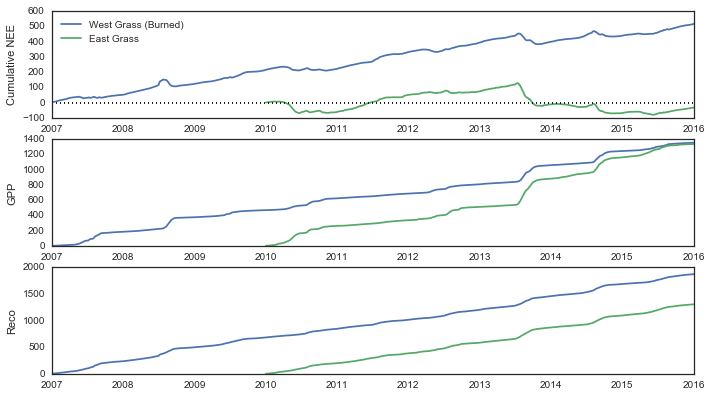

In [110]:
fig2 = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
ax = plt.subplot(3, 1, 1)
ax.plot(d.Seg.index, np.cumsum(d.Seg.FC_F_g_int))
ax.plot(d.Seg.index, np.cumsum(d.Sen.FC_F_g_int))
ax.axhline(y=0, xmin=0, xmax=1, ls=':', color='k')
ax.set_ylabel('Cumulative NEE')
plt.legend(['West Grass (Burned)', 'East Grass'], loc='upper left')
ax = plt.subplot(3, 1, 2)
ax.plot(d.Seg.index, np.cumsum(d.Seg.GPP_g_int))
ax.plot(d.Seg.index, np.cumsum(d.Sen.GPP_g_int))
ax.set_ylabel('GPP')
ax = plt.subplot(3, 1, 3)
ax.plot(d.Seg.index, np.cumsum(d.Seg.RECO_g_int))
ax.plot(d.Seg.index, np.cumsum(d.Sen.RECO_g_int))
ax.set_ylabel('Reco')

(0, 350)

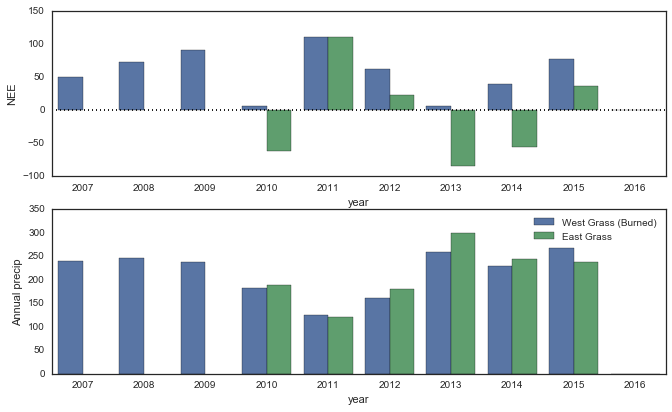

In [95]:
gby = d.Seg.groupby(d.Seg.index.year)
asums = gby.sum()
asums['site'] = 'West Grass (Burned)'
gby = d.Sen.groupby(d.Sen.index.year)
asums2 = gby.sum()
asums2['site'] = 'East Grass'
new = pd.concat([asums, asums2])
new['year'] = new.index
#new = pd.melt(new, id_vars=['year', 'site'], value_vars=['FC_F_g_int', 'P_F_sum'])
#print(new)
#sns.factorplot('year', 'value', hue='site', data=new, row='variable', kind='bar')
#g = sns.FacetGrid(new, row="variable", margin_titles=True)
#g.map(sns.barplot(x='year', y='value', label='site', data=new), color="steelblue", lw=0)
plt.figure(figsize=( 11, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
ax1 = plt.subplot(2, 1, 1)
sns.barplot(x='year', y='FC_F_g_int', hue='site', data=new, ax=ax1)
ax1.axhline(y=0, xmin=0, xmax=1, ls=':', color='k')
ax1.set_ylabel('NEE')
ax1.legend_.remove()
ax2 = plt.subplot(2, 1, 2)
sns.barplot(x='year', y='P_F_sum', hue='site', data=new, ax=ax2)
ax2.legend(loc='best')
ax2.set_ylabel('Annual precip')
ax2.set_ylim([0, 350])

### Raw Sevilleta core ANPP data

These are data from ANPP surveys at 4 core sites and there are 2 types of survey:

1. Volume data - see <http://sev.lternet.edu/data/sev-129>
2. Destructive biomass (weights) - see <http://sev.lternet.edu/data/sev-157>

In [68]:
# Core quadrat volume based ANPP data 
vol_npp = pd.read_csv("http://sev.lternet.edu/sites/default/files/data/sev-129/sev129_nppcorequadrat_20150819.txt")
vol_npp.head()


,year,season,date,site,web,plot,quad,treatment,species,obs,cover,height,count,comment
0,1999,1,2/3/1999,C,1,E,1,C,DAPU7,1,0.50,4,13,NaN
1,1999,1,2/3/1999,C,1,E,1,C,DAPU7,2,0.10,2,16,NaN
2,1999,1,2/3/1999,C,1,E,1,C,GUSA2,1,0.01,4,2,NaN
3,1999,1,2/3/1999,C,1,E,1,C,GUSA2,2,0.10,5,1,NaN
4,1999,1,2/3/1999,C,1,E,1,C,GUSA2,3,0.50,12,1,NaN


In [69]:
# I think these are the destructive (weights) used to correlate with volume
wt_npp = pd.read_csv("http://sev.lternet.edu/sites/default/files/data/sev157_nppweight_20160119_0.txt")
wt_npp.head()


,Year,Season,Date,Site,Treatment,Species,Observation,Count,Cover,Height,Live_Weight,Dead_Weight,Book,Comments
0,1999,1,2/4/1999,C,C,ARDI5,1,1,0.10,14,0.04,-888.0,99-1,NaN
1,1999,1,2/4/1999,C,C,ARDI5,2,1,0.10,14,0.06,-888.0,99-1,NaN
2,1999,1,2/4/1999,C,C,ARDI5,3,1,0.10,21,0.10,-888.0,99-1,NaN
3,1999,1,2/4/1999,C,C,ARDI5,4,1,0.25,20,0.37,-888.0,99-1,NaN
4,1999,1,2/4/1999,C,C,ARDI5,5,1,0.25,20,0.29,-888.0,99-1,NaN


### Combined volume and destructive (allometry) ANPP data 

see <http://sev.lternet.edu/data/sev-182>

Pretty sure this is the combination of the two datasets above into actual biomass numbers

In [5]:
allom_npp = pd.read_csv("http://sev.lternet.edu/sites/default/files/data/sev-182/sev182_nppcorewebbiomass_20150817.txt")
print(np.unique(allom_npp.web))
print(np.unique(allom_npp.treatment))
allom_npp.head()

[1 2 3 4 5]
['C']


,year,site,treatment,web,plot,quad,species,wwt,swt,fwt,snpp,fnpp,anpp
0,1999,C,C,1,E,1,CHSE7,0.00,0.00,0.05,0.00,0.05,0.05
1,1999,C,C,1,E,1,CHSES,0.00,0.00,0.04,0.00,0.04,0.04
2,1999,C,C,1,E,1,DAPU7,0.12,1.62,2.79,1.49,1.17,2.67
3,1999,C,C,1,E,1,GUSA2,0.79,0.31,18.43,0.00,18.12,18.12
4,1999,C,C,1,E,1,LEFE,0.37,0.17,0.00,0.00,0.00,0.00


B = Blue grama core site
G = Black grama core site
C = Creosote shrub core site

   year  web plotname  quad     wwt     swt     fwt  snpp   fnpp   anpp
0  1999    1        E     1    1.28    2.55   27.42  1.94  25.04  26.99
1  1999    1        E     2  238.43  102.56   89.55  1.45  27.29  28.75
2  1999    1        E     3   36.00   12.47   39.04  1.12  26.58  27.69
3  1999    1        E     4  193.54  134.86  123.16  1.96  16.39  18.35
4  1999    1        N     1    3.27    4.53   10.86  3.88   7.24  11.10
   year  web plotname  quad    wwt    swt     fwt  snpp    fnpp    anpp
0  2002    1        E     1  43.30  22.61  178.22  1.59  155.61  157.21
1  2002    1        E     2   0.84   2.71  142.21  2.41  139.50  141.91
2  2002    1        E     3   0.70   2.58   68.39  1.95   65.87   67.82
3  2002    1        E     4   1.38   1.23   88.46  0.46   87.26   87.71
4  2002    1        N     1   0.63   2.12   68.31  1.82   66.20   68.01


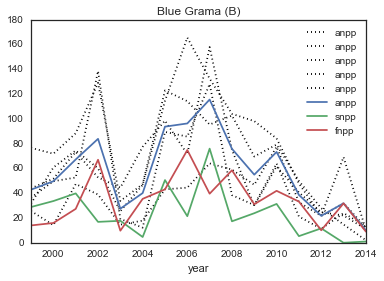

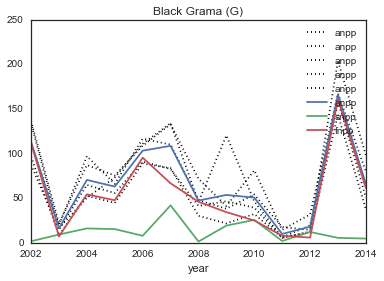

In [22]:
# Run through sites and plot long term npp data
sites = ['C', 'B']
names = ['Blue Grama (B)', 'Black Grama (G)']
for i, site in enumerate(sites):
    # Subset by site
    subset = allom_npp[allom_npp.site==site]
    # Rename plot so pandas isn't confused
    subset = subset.rename(columns={'plot':'plotname'})
    # Group by year, web, plot, and quad and sum anpp for all species.
    # This should be total biomass per m2 quad
    gby = subset.groupby(['year', 'web', 'plotname', 'quad'], as_index=False)
    sumanpp = gby.sum()
    print(sumanpp.head())
    # Group by year and take average of these sums
    gby = sumanpp.groupby('year')
    avganpp = gby.mean()
    # Group by year and web and take average of these sums
    gby = sumanpp.groupby(['year', 'web'], as_index=False)
    avgwebanpp = gby.mean()
    # Plot
    plt.figure()
    # Plot individual webs
    for j in np.unique(allom_npp.web):
        idx = avgwebanpp.web==j
        plt.plot(avgwebanpp[idx].year, avgwebanpp[idx].anpp, ':k')
    avganpp.anpp.plot()
    avganpp.snpp.plot()
    avganpp.fnpp.plot()
    
    plt.legend()
    plt.title(names[i])

### Belowground NPP (root ingrowth donuts)

see <http://sev.lternet.edu/data/sev-175>

bnpp = pd.read_csv("http://sev.lternet.edu/sites/default/files/data/sev175_rootingrowth_20160127.txt")
bnpp.head()

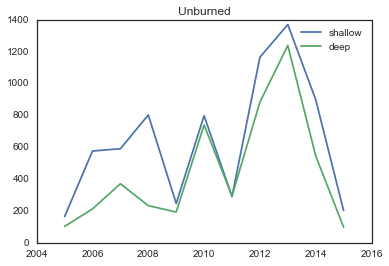

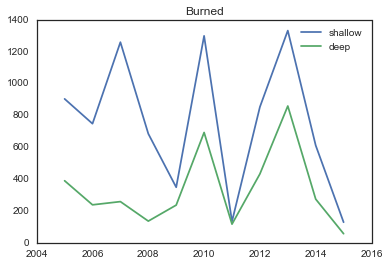

In [121]:
sites = ['DW', 'DWB']
names = ['Unburned', 'Burned']
for i, site in enumerate(sites):
    # Subset by site
    subset = bnpp[bnpp.Site==site]
    # Group by year, site, and depth
    gby = subset.groupby(['Date', 'Site', 'Depth'], as_index=False)
    subset = gby.mean()
    # get deep and shallow
    bnpp_s = subset[subset.Depth=='0-15']
    bnpp_d = subset[subset.Depth=='15-30']
    # Plot
    plt.figure()
    plt.plot(bnpp_s.Date, bnpp_s.Root_Weight)
    plt.plot(bnpp_d.Date, bnpp_d.Root_Weight)
    plt.legend(['shallow', 'deep'])
    plt.title(names[i])

### Notes from  meeting with Scott

* East Grass had a prescribed burned in 2003, most recently, but there were 2 smaller preceeding fires in the area, one in 2001 and one in 1995. The area burned in 1995 reburned in 2003, but the area burned in 2001 did not reburn in 2003. There are some line intercept transects that were measured from 1995 to 2012. The north end of these transects are in the 1995 burn area, and the south ends of them are in the 2001 fire area (not reburned), so the south end should have a community composition recovery history from 2001 to 2012 that could be compared to the core site transects across the road (measured 1989 to 2015).
    
* Look at old Seg data (pre-2007, Kurc and Small)
    
* There is also a mixed grass burned ANPP dataset from the monsoon project on the west side of the road. These may show some indication of recovery from the fire.